Name: Jiya Hona
Symbol: 29097/078

Time taken with batch size 4096: 0.0367 seconds
Time taken with batch size 6000: 0.0460 seconds
Time taken with batch size 8000: 0.0321 seconds
Time taken with batch size 10000: 0.0371 seconds
Time taken with batch size 15000: 0.0365 seconds

Best batch size: 8000


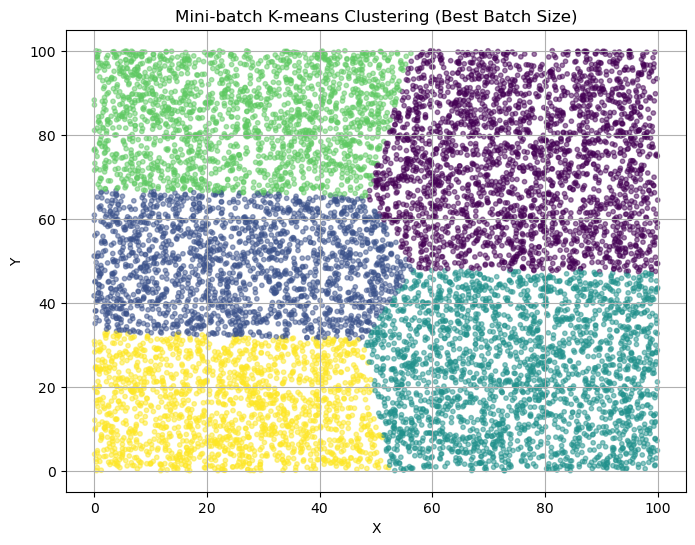

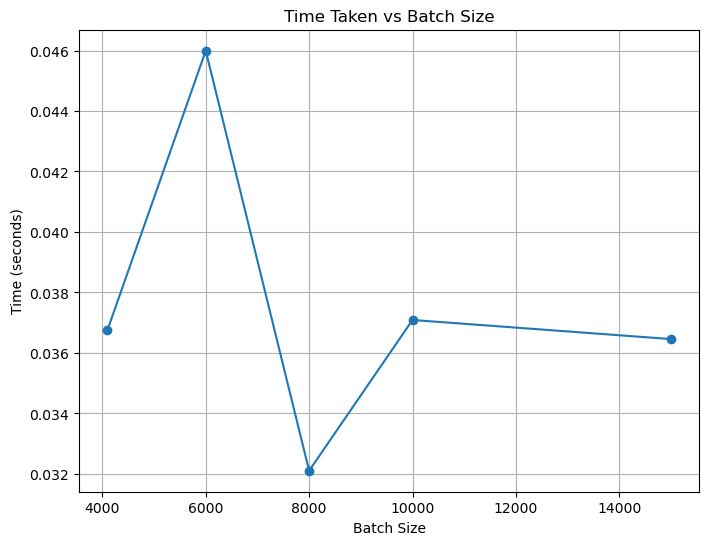

In [3]:
import os
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

print("Name: Jiya Hona")
print("Symbol: 29097/078\n")

# Set environment variables to mitigate warnings
os.environ["OMP_NUM_THREADS"] = "1"  # Avoid memory leak in MiniBatchKMeans on Windows
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Limit to 4 cores (adjust based on your CPU)

# Generate 10,000 2-D data points in the range 0-100
np.random.seed(42)  # For reproducibility
data = np.random.rand(10000, 2) * 100

# Define batch sizes to test (minimum 4096 as per warning)
batch_sizes = [4096, 6000, 8000, 10000, 15000]
times = []

# Test Mini-batch K-means for each batch size
for batch_size in batch_sizes:
    # Initialize Mini-batch K-means algorithm
    minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=batch_size, random_state=42)
    
    # Measure the time taken by the algorithm
    start_time = time.time()
    minibatch_kmeans.fit(data)
    end_time = time.time()
    
    # Calculate the time taken
    time_taken = end_time - start_time
    times.append(time_taken)
    print(f"Time taken with batch size {batch_size}: {time_taken:.4f} seconds")

# Determine the best batch size (minimum time)
best_batch_size = batch_sizes[np.argmin(times)]
print(f"\nBest batch size: {best_batch_size}")

# Visualize the clusters for the best batch size
best_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=best_batch_size, random_state=42)
best_kmeans.fit(data)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=best_kmeans.labels_, cmap='viridis', s=10, alpha=0.5)
plt.title("Mini-batch K-means Clustering (Best Batch Size)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Plot time vs batch size
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, times, marker='o')
plt.title("Time Taken vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()